In [ ]:
#@title install report lib
pip install -U ydata-profiling

In [51]:
#@title import lib and data
from logging import warning
import pandas as pd
import matplotlib.pyplot as plt
#from dataprep.eda import create_report
import warnings
warnings.filterwarnings("ignore")
df_pd = pd.read_excel("/content/Reps summary-01JAN23-31DEC23.xlsx")
df_pd.head()

,Role,Id,Name,Date,Start day,End day,Total time,Break,Travel distance,Visits,Photos,Notes,Orders,New clients,Cases sold,Total revenue
0,SALES,235114,Ivan Khymych,2023-02-04,07:53 AM,12:59 AM,17h 7m,0h 0m,0.00 mi,1,0,0,0,0,0,0.00
1,SALES,235114,Ivan Khymych,2023-03-01,10:25 AM,12:59 AM,14h 34m,0h 0m,0.00 mi,0,0,0,0,0,0,0.00
2,SALES,235114,Ivan Khymych,2023-03-04,01:22 PM,12:59 AM,23h 14m,0h 0m,0.01 mi,2,0,0,0,0,0,0.00
3,SALES,235114,Ivan Khymych,2023-03-05,10:30 AM,12:59 AM,14h 29m,0h 0m,0.00 mi,1,0,0,1,0,8,249.04
4,SALES,235114,Ivan Khymych,2023-03-07,10:16 AM,10:16 AM,0h 0m,0h 0m,0.00 mi,0,0,0,0,0,0,0.00


In [4]:
#@title data info
df_pd.info()
from ydata_profiling import ProfileReport
profile = ProfileReport(df_pd, title="Profiling Report")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Role             66 non-null     object 
 1   Id               66 non-null     int64  
 2   Name             66 non-null     object 
 3   Date             66 non-null     object 
 4   Start day        62 non-null     object 
 5   End day          62 non-null     object 
 6   Total time       66 non-null     object 
 7   Break            66 non-null     object 
 8   Travel distance  66 non-null     object 
 9   Visits           66 non-null     int64  
 10  Photos           66 non-null     int64  
 11  Notes            66 non-null     int64  
 12  Orders           66 non-null     int64  
 13  New clients      66 non-null     int64  
 14  Cases sold       66 non-null     int64  
 15  Total revenue    66 non-null     float64
dtypes: float64(1), int64(7), object(8)
memory usage: 8.4+ KB


In [6]:
# @title Report Order sales summary
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#@title data preprocessing
import pandas as pd
import numpy as np

def preprocess_data(data):
    """
    Data preprocessing: data type conversion and cleaning.

    Args:
        data: A Pandas DataFrame with the source data.

    Returns:
        Pandas DataFrame with the processed data.
    """

    # Identify numeric columns automatically
    numeric_cols = data.select_dtypes(include=np.number).columns

    # Process numeric columns
    for col in numeric_cols:
        # Check for missing values (NaN)
        if np.isnan(data[col]).any():
            print(f"Warning: Column '{col}' contains missing values (NaN).")

    # Remove currency symbols and thousands separators
    data[numeric_cols] = data[numeric_cols].replace('[$,]', '', regex=True).astype(float)

    return data
processed_data = preprocess_data(df_pd)

In [9]:
#@title processed data
processed_data

,Role,Id,Name,Date,Start day,End day,Total time,Break,Travel distance,Visits,Photos,Notes,Orders,New clients,Cases sold,Total revenue
0,SALES,235114.0,Ivan Khymych,2023-02-04,07:53 AM,12:59 AM,17h 7m,0h 0m,0.00 mi,1.0,0.0,0.0,0.0,0.0,0.0,0.00
1,SALES,235114.0,Ivan Khymych,2023-03-01,10:25 AM,12:59 AM,14h 34m,0h 0m,0.00 mi,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,SALES,235114.0,Ivan Khymych,2023-03-04,01:22 PM,12:59 AM,23h 14m,0h 0m,0.01 mi,2.0,0.0,0.0,0.0,0.0,0.0,0.00
3,SALES,235114.0,Ivan Khymych,2023-03-05,10:30 AM,12:59 AM,14h 29m,0h 0m,0.00 mi,1.0,0.0,0.0,1.0,0.0,8.0,249.04
4,SALES,235114.0,Ivan Khymych,2023-03-07,10:16 AM,10:16 AM,0h 0m,0h 0m,0.00 mi,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,MERCHANDISER,575383.0,Ivan Vasylets,2023-03-24,11:16 AM,11:59 PM,12h 41m,0h 0m,0.05 mi,1.0,0.0,0.0,0.0,0.0,0.0,0.00
62,MERCHANDISER,575383.0,Ivan Vasylets,2023-03-27,01:11 PM,11:59 PM,10h 48m,0h 0m,0.11 mi,0.0,0.0,0.0,0.0,0.0,0.0,0.00
63,MERCHANDISER,575383.0,Ivan Vasylets,2023-04-14,04:50 AM,06:58 AM,0h 22m,0h 2m,0.22 mi,2.0,0.0,0.0,0.0,0.0,0.0,0.00
64,MERCHANDISER,575383.0,Ivan Vasylets,2023-04-17,10:55 AM,11:23 AM,0h 12m,0h 0m,0.93 mi,3.0,0.0,0.0,0.0,0.0,0.0,0.00


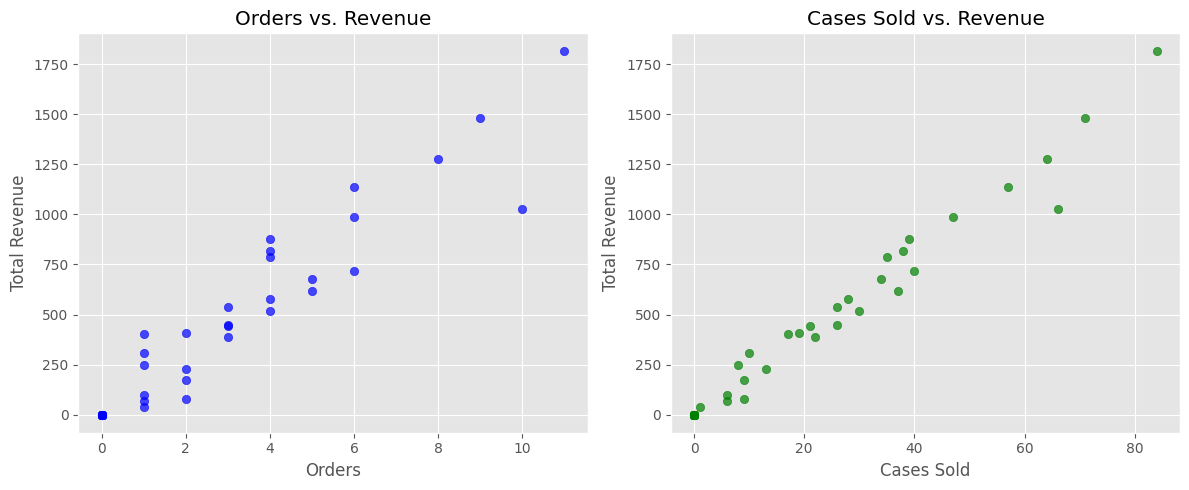

In [50]:
#@title Visualize the relationships between Orders/Cases Sold and Revenue
def plot_sales_relationships(df):
  """
  Creates scatter plots to visualize the relationships between Orders/Cases Sold and Revenue.
  """
  # Set plot style
  plt.style.use('ggplot')

  # Create subplots
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

  # Plot Orders vs. Revenue
  axes[0].scatter(df['Orders'], df['Total revenue'], color='blue', alpha=0.7)
  axes[0].set_xlabel("Orders")
  axes[0].set_ylabel("Total Revenue")
  axes[0].set_title("Orders vs. Revenue")

  # Plot Cases Sold vs. Revenue
  axes[1].scatter(df['Cases sold'], df['Total revenue'], color='green', alpha=0.7)
  axes[1].set_xlabel("Cases Sold")
  axes[1].set_ylabel("Total Revenue")
  axes[1].set_title("Cases Sold vs. Revenue")

  # Adjust layout and show plot
  plt.tight_layout()
  plt.show()
plot_sales_relationships(processed_data)

These plots are valuable for understanding sales performance and identifying potential areas for improvement. Here's what we can infer:
Positive Correlation: Both plots suggest a positive correlation between the respective x-axis variables (orders and cases sold) and total revenue. This means that as the number of orders or cases sold increases, the total revenue tends to increase as well. This is a generally expected trend in a healthy sales environment.
Trend Analysis: By observing the distribution of data points, you can analyze the trend of the relationship. Is it linear, exponential, or something else? This can provide insights into the sales process and help predict future revenue based on order/case volume.
Outliers: Look for data points that deviate significantly from the general trend. These outliers could represent exceptional sales events, specific clients with large orders, or other unique situations. Investigating outliers can lead to valuable insights and potential opportunities.
Comparison: Comparing the two plots can reveal which factor (orders or cases sold) has a stronger influence on total revenue. This information can help businesses focus their efforts on the most impactful sales strategies.

---



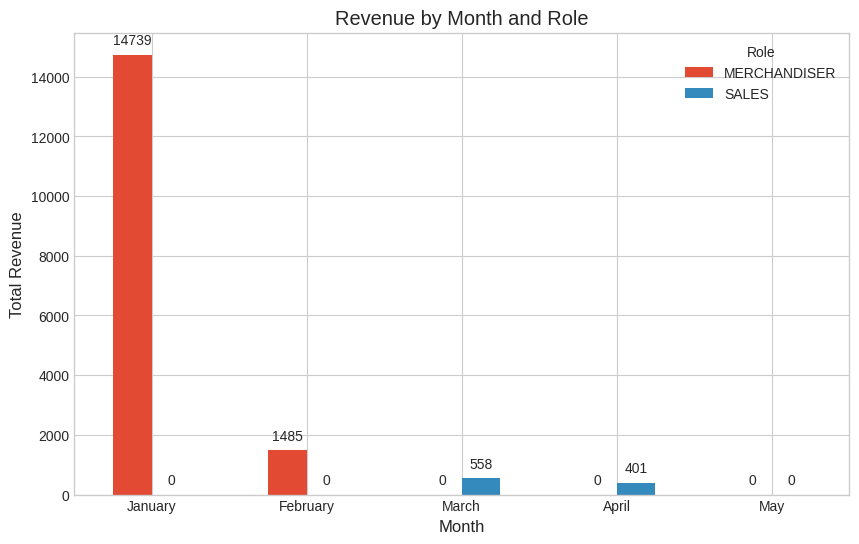

In [21]:
#@title Revenue by Month and Role
def plot_revenue_by_month_and_role(df):
  """
  Creates a bar chart with enhanced features to visualize revenue by month and role.
  """
  import calendar
  # Data Preparation (same as before)
  df['Month'] = pd.to_datetime(df['Date']).dt.month
  df['Total revenue'] = df['Total revenue']

  # Group data (same as before)
  grouped_data = df.groupby(['Month', 'Role'])['Total revenue'].sum().unstack(fill_value=0)

  # Set plot style
  plt.style.use('seaborn-whitegrid')

  # Create bar chart
  ax = grouped_data.plot(kind='bar', figsize=(10, 6))
  plt.xlabel("Month")
  plt.ylabel("Total Revenue")
  plt.title("Revenue by Month and Role")

  # Customize x-axis tick labels
  plt.xticks(rotation=0)
  month_labels = [calendar.month_name[month] for month in grouped_data.index]
  ax.set_xticklabels(month_labels)

  # Add value labels above bars
  for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

  # Move legend to upper right
  plt.legend(title="Role", loc='upper right')

  plt.grid(True)
  plt.show()
plot_revenue_by_month_and_role(processed_data)

This chart helps visualize the sales performance of different roles (SALES and MERCHANDISER) over time.
It shows which roles are generating more revenue in different months and how the revenue trends vary across roles.
The business can use this information to identify seasonal patterns, allocate resources effectively, and develop targeted sales strategies for each role.

---



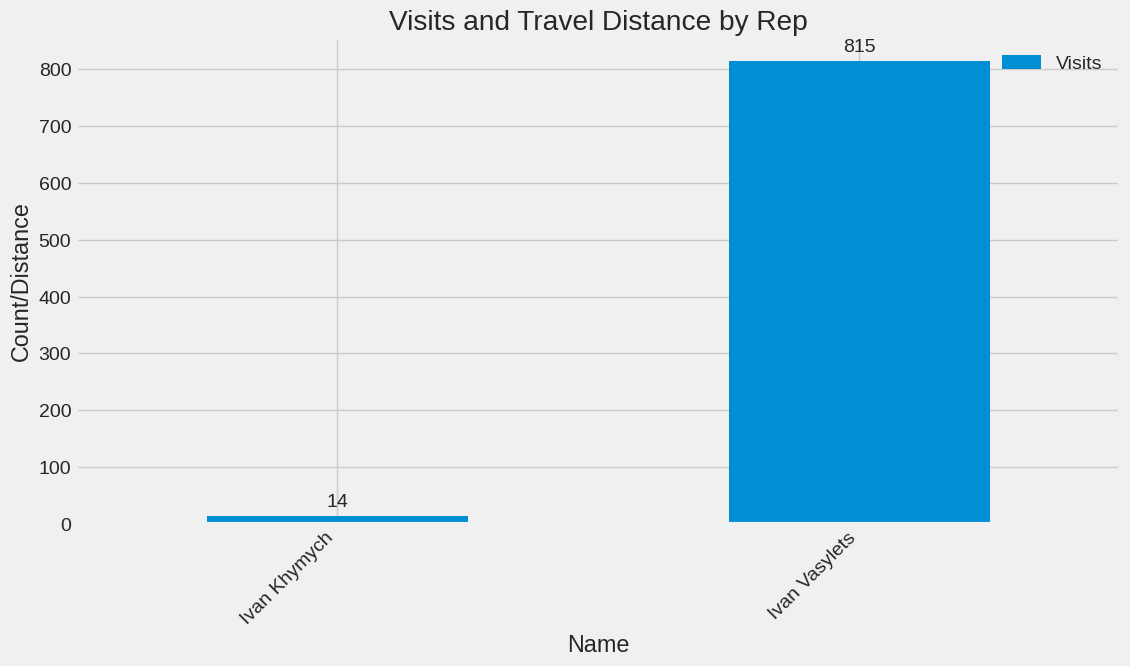

In [22]:
#@title Visualize visits and travel distance for each name
def plot_visits_and_travel_distance_by_name(df):
  """
  Creates grouped bar charts to visualize visits and travel distance for each Name.
  """
  # Set plot style
  plt.style.use('fivethirtyeight')

  # Group data by name and calculate sums
  grouped_data = df.groupby('Name')[['Visits', 'Travel distance']].sum()

  # Create grouped bar chart
  ax = grouped_data.plot(kind='bar', figsize=(12, 6))
  plt.xlabel("Name")
  plt.ylabel("Count/Distance")
  plt.title("Visits and Travel Distance by Rep")
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
  plt.grid(True)

  # Add annotations above the bars
  for p in ax.patches:
      ax.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

  # Customize legend
  plt.legend(title='', loc='upper right')

  plt.show()
plot_visits_and_travel_distance_by_name(processed_data)

This chart allows for easy comparison of the number of visits and total travel distance covered by each sales representative.
It can help identify reps who are more active in the field, those who cover larger territories, or potential imbalances in workload distribution.
The business can use this information to optimize travel routes, assess sales rep performance, and make informed decisions about territory management.

---



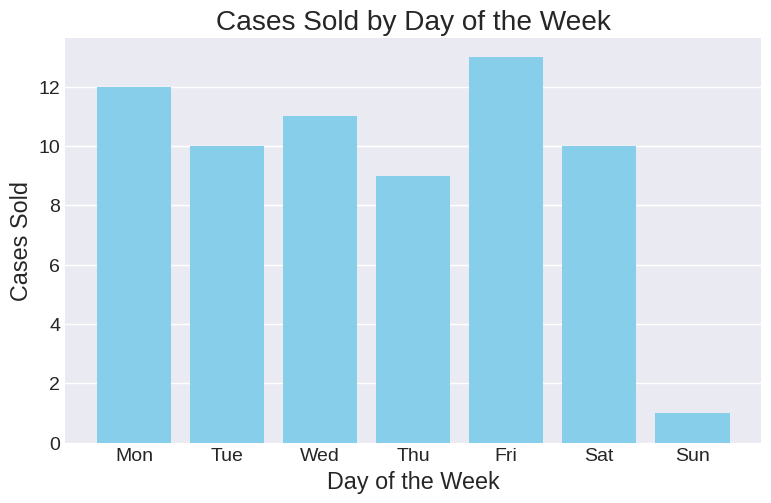

In [23]:
#@title Visualize the number of cases sold for each day of the week
def plot_cases_sold_by_day_of_week(df):
  """
  Creates a bar chart to visualize the number of cases sold for each day of the week.
  """
  # Prepare data
  df['Day of Week'] = pd.to_datetime(df['Date']).dt.dayofweek  # 0 is Monday, 6 is Sunday
  weekday_counts = df['Day of Week'].value_counts().sort_index()

  # Set plot style
  plt.style.use('seaborn-dark')

  # Create bar chart
  plt.figure(figsize=(8, 5))
  plt.bar(weekday_counts.index, weekday_counts.values, color='skyblue')
  plt.xlabel("Day of the Week")
  plt.ylabel("Cases Sold")
  plt.title("Cases Sold by Day of the Week")
  plt.xticks(weekday_counts.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
  plt.grid(True, axis='y')  # Add grid lines only to the y-axis
  plt.show()
plot_cases_sold_by_day_of_week(processed_data)

This chart shows the distribution of cases sold across different days of the week.
It can reveal if there are specific days when sales are higher or lower, potentially indicating patterns in customer behavior or sales rep activity.
The business can use this information to plan marketing campaigns, adjust staffing levels, and optimize sales strategies for different days of the week.

---



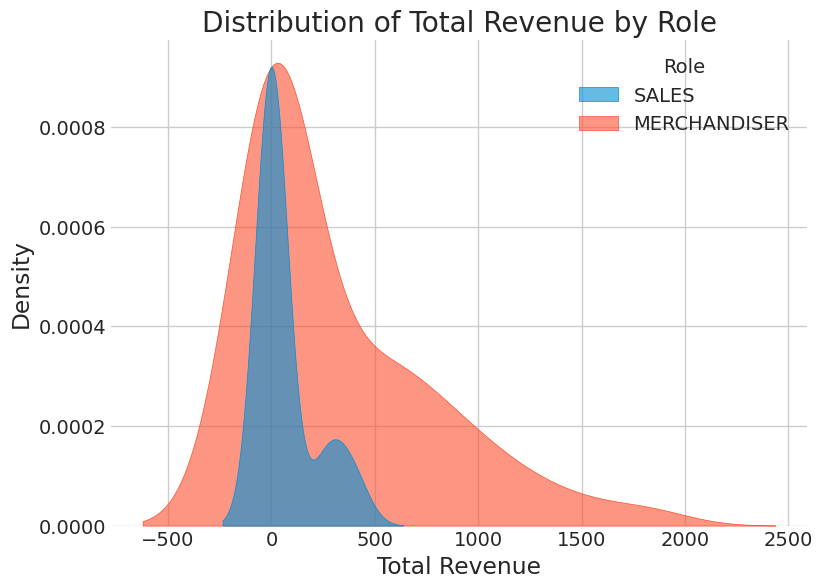

In [25]:
#@title visualize and compare the distribution of total revenue for each Role
def plot_revenue_distribution_by_role(df):
  """
  Creates density plots to visualize and compare the distribution of total revenue for each Role.
  """
  # Data preparation
  df['Total revenue'] = df['Total revenue']

  # Set plot style
  sns.set_style("whitegrid")

  # Create density plot
  plt.figure(figsize=(8, 6))
  sns.kdeplot(data=df, x='Total revenue', hue='Role', fill=True, alpha=0.6)
  plt.xlabel("Total Revenue")
  plt.ylabel("Density")
  plt.title("Distribution of Total Revenue by Role")
  plt.grid(True)
  plt.show()

plot_revenue_distribution_by_role(processed_data)

Density plots visualize the distribution of revenue generated by each role, showing the range, concentration, and shape of the data.
You can compare the curves to see if one role tends to generate higher revenue, if there are differences in the spread of revenue, or if there are any outliers.
This information can help the business understand the revenue potential of different roles, identify areas for improvement, and tailor sales strategies accordingly.

---



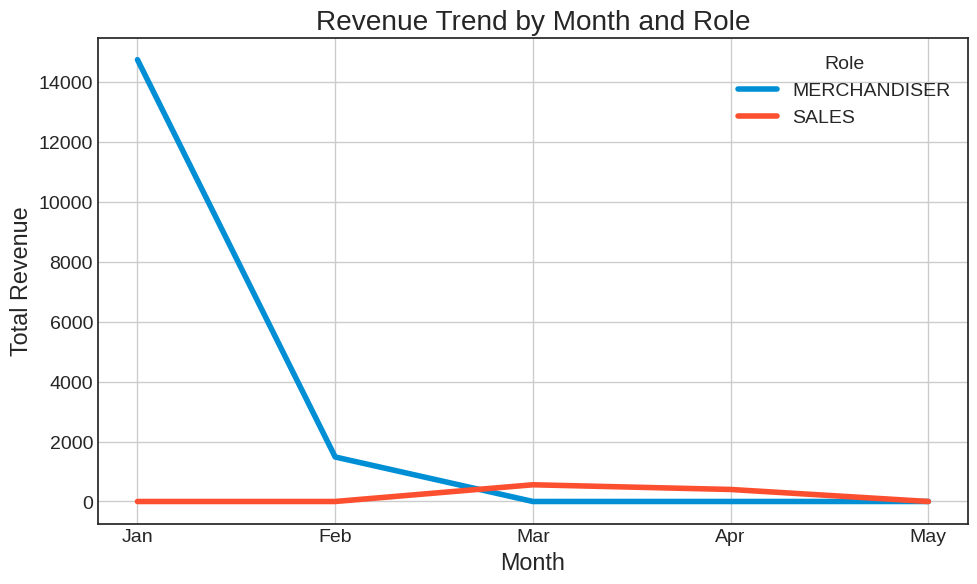

In [34]:
#@title Visualizing Revenue Trends over Time for Each Role
def plot_revenue_trend_by_month_and_role(df):
  """
  Creates a line plot to visualize the trend of total revenue over time for each Role.
  """
  import calendar
  # Data Preparation
  df['Month'] = pd.to_datetime(df['Date']).dt.month

  # Calculate monthly revenue for each role
  monthly_revenue = df.groupby(['Month', 'Role'])['Total revenue'].sum().unstack(fill_value=0)

  # Set plot style
  plt.style.use('seaborn-white')

  # Create line plot
  plt.figure(figsize=(10, 6))
  plt.plot(monthly_revenue)
  plt.xlabel("Month")
  plt.ylabel("Total Revenue")
  plt.title("Revenue Trend by Month and Role")
  plt.xticks(monthly_revenue.index, [calendar.month_abbr[m] for m in monthly_revenue.index])
  plt.grid(True)
  plt.legend(monthly_revenue.columns, title="Role", loc='upper right')
  plt.show()

plot_revenue_trend_by_month_and_role(processed_data)

This plot helps visualize how the revenue generated by each role changes over the months.
It can reveal trends, seasonality, and potential growth or decline patterns for each role.
The business can use this information to understand revenue fluctuations, predict future performance, and make strategic decisions about resource allocation and sales strategie

---



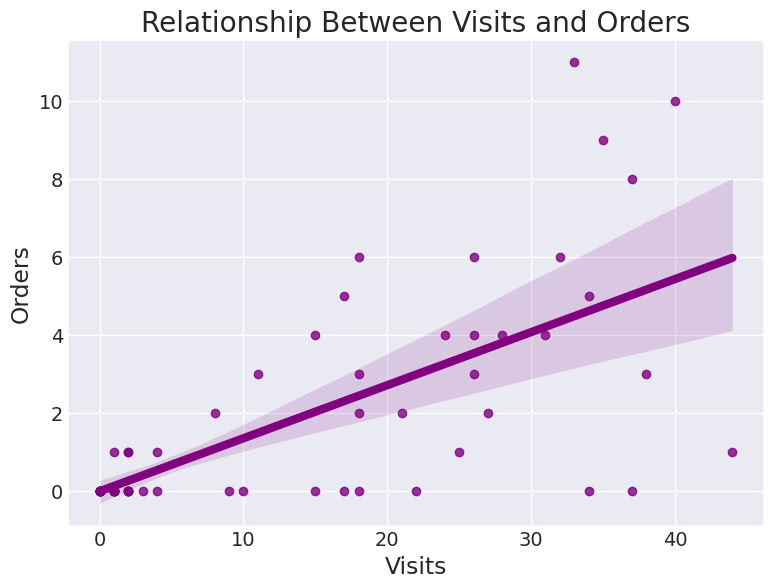

In [37]:
#@title Exploring the Relationship Between Visits and Orders
def plot_orders_vs_visits_with_regression(df):
  """
  Creates a scatter plot of Orders vs. Visits with a regression line to visualize the trend.
  """
  # Set plot style
  sns.set_style("darkgrid")

  # Create scatter plot with regression line
  plt.figure(figsize=(8, 6))
  sns.regplot(data=df, x='Visits', y='Orders', color='purple', marker='o')
  plt.xlabel("Visits")
  plt.ylabel("Orders")
  plt.title("Relationship Between Visits and Orders")
  plt.grid(True)
  plt.show()

plot_orders_vs_visits_with_regression(processed_data)

This plot helps visualize the relationship between the number of visits made by reps and the number of orders they receive.
The regression line shows the overall trend, indicating if there's a positive, negative, or no clear correlation between visits and orders.
Businesses can analyze this relationship to assess the effectiveness of sales visits, identify potential areas for improvement, and refine sales strategies to optimize order generation.

---



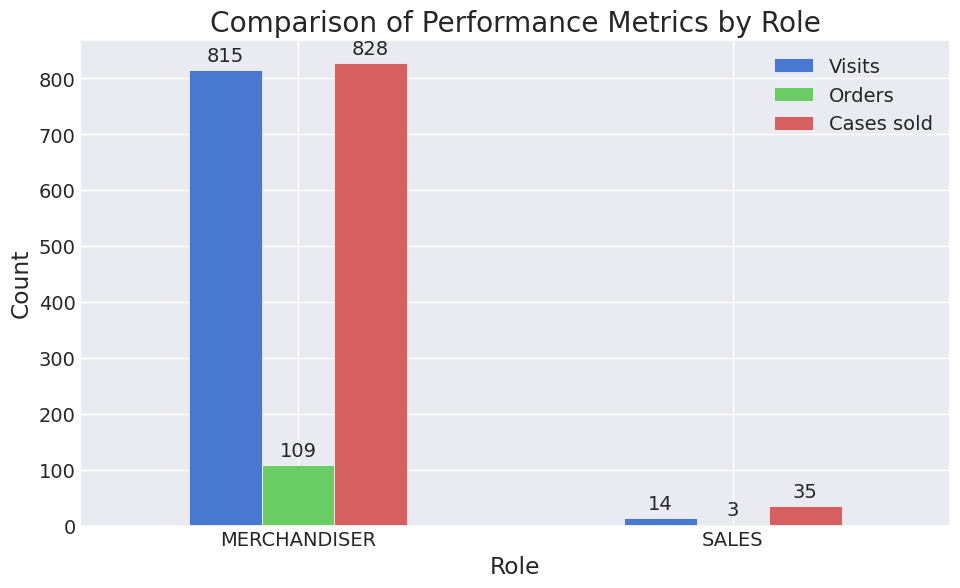

In [38]:
#@title Comparing Performance Metrics for Different Roles
def plot_multiple_metrics_by_role(df):
  """
  Creates a grouped bar chart to compare multiple performance metrics (Visits, Orders, Cases Sold) for each Role.
  """
  # Set plot style
  plt.style.use('seaborn-muted')

  # Group data by role and calculate sums for each metric
  grouped_data = df.groupby('Role')[['Visits', 'Orders', 'Cases sold']].sum()

  # Create grouped bar chart
  ax = grouped_data.plot(kind='bar', figsize=(10, 6))
  plt.xlabel("Role")
  plt.ylabel("Count")
  plt.title("Comparison of Performance Metrics by Role")
  plt.xticks(rotation=0)
  plt.grid(True)

  # Add annotations above the bars
  for p in ax.patches:
      ax.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

  plt.show()
plot_multiple_metrics_by_role(processed_data)

This chart provides a direct comparison of key performance metrics (visits, orders, cases sold) between different sales roles (SALES and MERCHANDISER).
It can reveal which roles are more effective in different aspects of the sales process.
Businesses can use this information to identify strengths and weaknesses of each role, allocate resources effectively, and design targeted training or support programs.

---



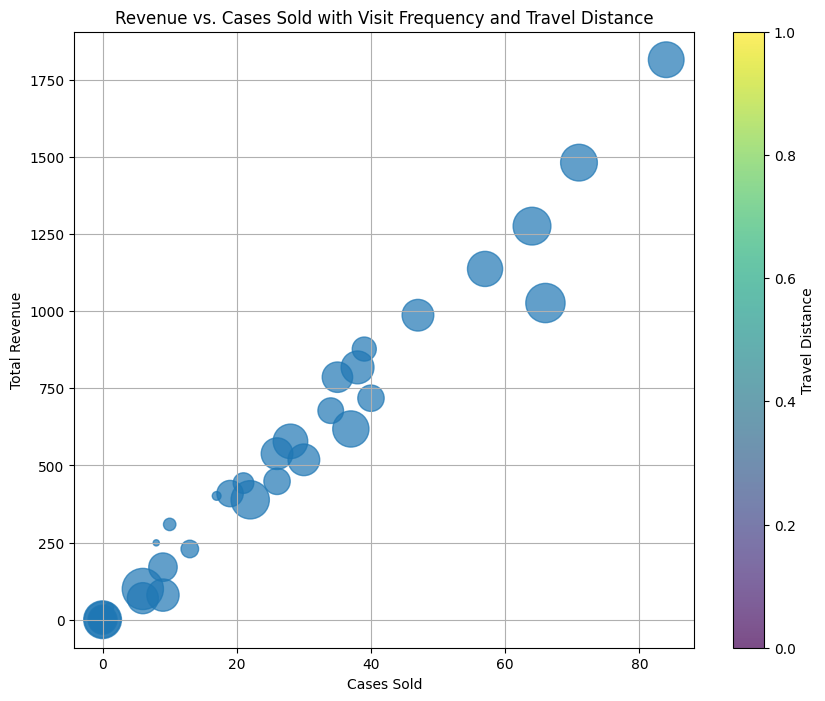

In [49]:
#@title Identifying Potential High-Value Clients
def plot_revenue_vs_cases_sold_with_size_and_color(df):
  """
  Creates a scatter plot of Revenue vs. Cases Sold, where marker size and color represent additional variables.
  """

  # Set plot style
  plt.style.use('default')

  # Create scatter plot
  plt.figure(figsize=(10, 8))
  plt.scatter(x=df['Cases sold'], y=df['Total revenue'],
              s=df['Visits'] * 20,  # Marker size based on number of visits
              cmap='viridis', alpha=0.7)
  plt.xlabel("Cases Sold")
  plt.ylabel("Total Revenue")
  plt.title("Revenue vs. Cases Sold with Visit Frequency and Travel Distance")
  plt.colorbar(label="Travel Distance")
  plt.grid(True)
  plt.show()

plot_revenue_vs_cases_sold_with_size_and_color(processed_data)

This plot provides a richer visualization of the relationship between revenue and cases sold by incorporating information about visit frequency (marker size) and travel distance (marker color).
Businesses can identify clients who generate high revenue with fewer cases sold (potentially high-value clients), those who require more visits, and those located farther away (potentially impacting travel costs and efficiency).
This information can help in segmenting clients, tailoring sales approaches, and optimizing resource allocation.

---

